### Copying the sentenses from the text file

In [ ]:
## Q1.

all_sentenses = [
    'The average person squanders about forty days a year compensating for things he or she has forgotten.', 
    'It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.', 
    'A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.', 
    'What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.', 
    'In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.'
    
]


In [ ]:
# print the length of sentenses
len(all_sentenses)

5

In [ ]:
# print the sentense
from pprint import pprint

print(all_sentenses)

['The average person squanders about forty days a year compensating for things he or she has forgotten.', 'It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.', 'A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.', 'What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.', 'In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.']


### POS TAGGING

In [ ]:
# spacy module will be used in this case
import spacy
spacy_nlp = spacy.load("en_core_web_sm")

In [ ]:
# iterate through all sentenses and create spacy model for each to extact the pos tags
for sentense in all_sentenses:
    spacy_model = spacy_nlp(sentense)
    print(f"SENTENSE  {sentense}")
    token_tags = [f"{str(tok)} ->  {tok.pos_}" for tok in spacy_model]

    print(token_tags, end='\n\n')

SENTENSE  The average person squanders about forty days a year compensating for things he or she has forgotten.
['The ->  DET', 'average ->  ADJ', 'person ->  NOUN', 'squanders ->  VERB', 'about ->  ADP', 'forty ->  NUM', 'days ->  NOUN', 'a ->  DET', 'year ->  NOUN', 'compensating ->  VERB', 'for ->  ADP', 'things ->  NOUN', 'he ->  PRON', 'or ->  CCONJ', 'she ->  PRON', 'has ->  AUX', 'forgotten ->  VERB', '. ->  PUNCT']

SENTENSE  It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.
['It ->  PRON', 'was ->  AUX', 'simply ->  ADV', 'a ->  DET', 'matter ->  NOUN', 'of ->  ADP', 'learning ->  VERB', 'to ->  PART', '“ ->  PUNCT', 'think ->  VERB', 'in ->  ADP', 'more ->  ADV', 'memorable ->  ADJ', 'ways ->  NOUN', '” ->  PUNCT', 'using ->  VERB', 'the ->  DET', '“ ->  PUNCT', 'ex

### Dependecy and Constituency Parsing

In [ ]:
!pip install stanza -q

In [ ]:
import stanza
from IPython.display import display
from nltk.tree import Tree

In [ ]:
import stanza
# download english model
stanza.download('en')
# initialize the stanza for english modle
stanza_nlp = stanza.Pipeline('en')

INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: constituency
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Constituency Analysis results
SENTENSE  The average person squanders about forty days a year compensating for things he or she has forgotten. 




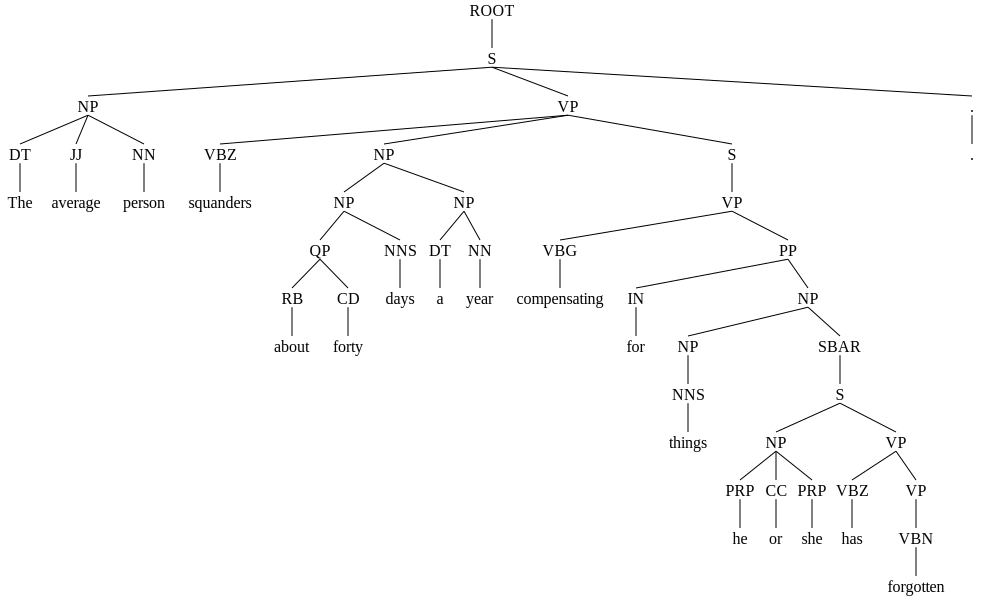

SENTENSE  It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse. 




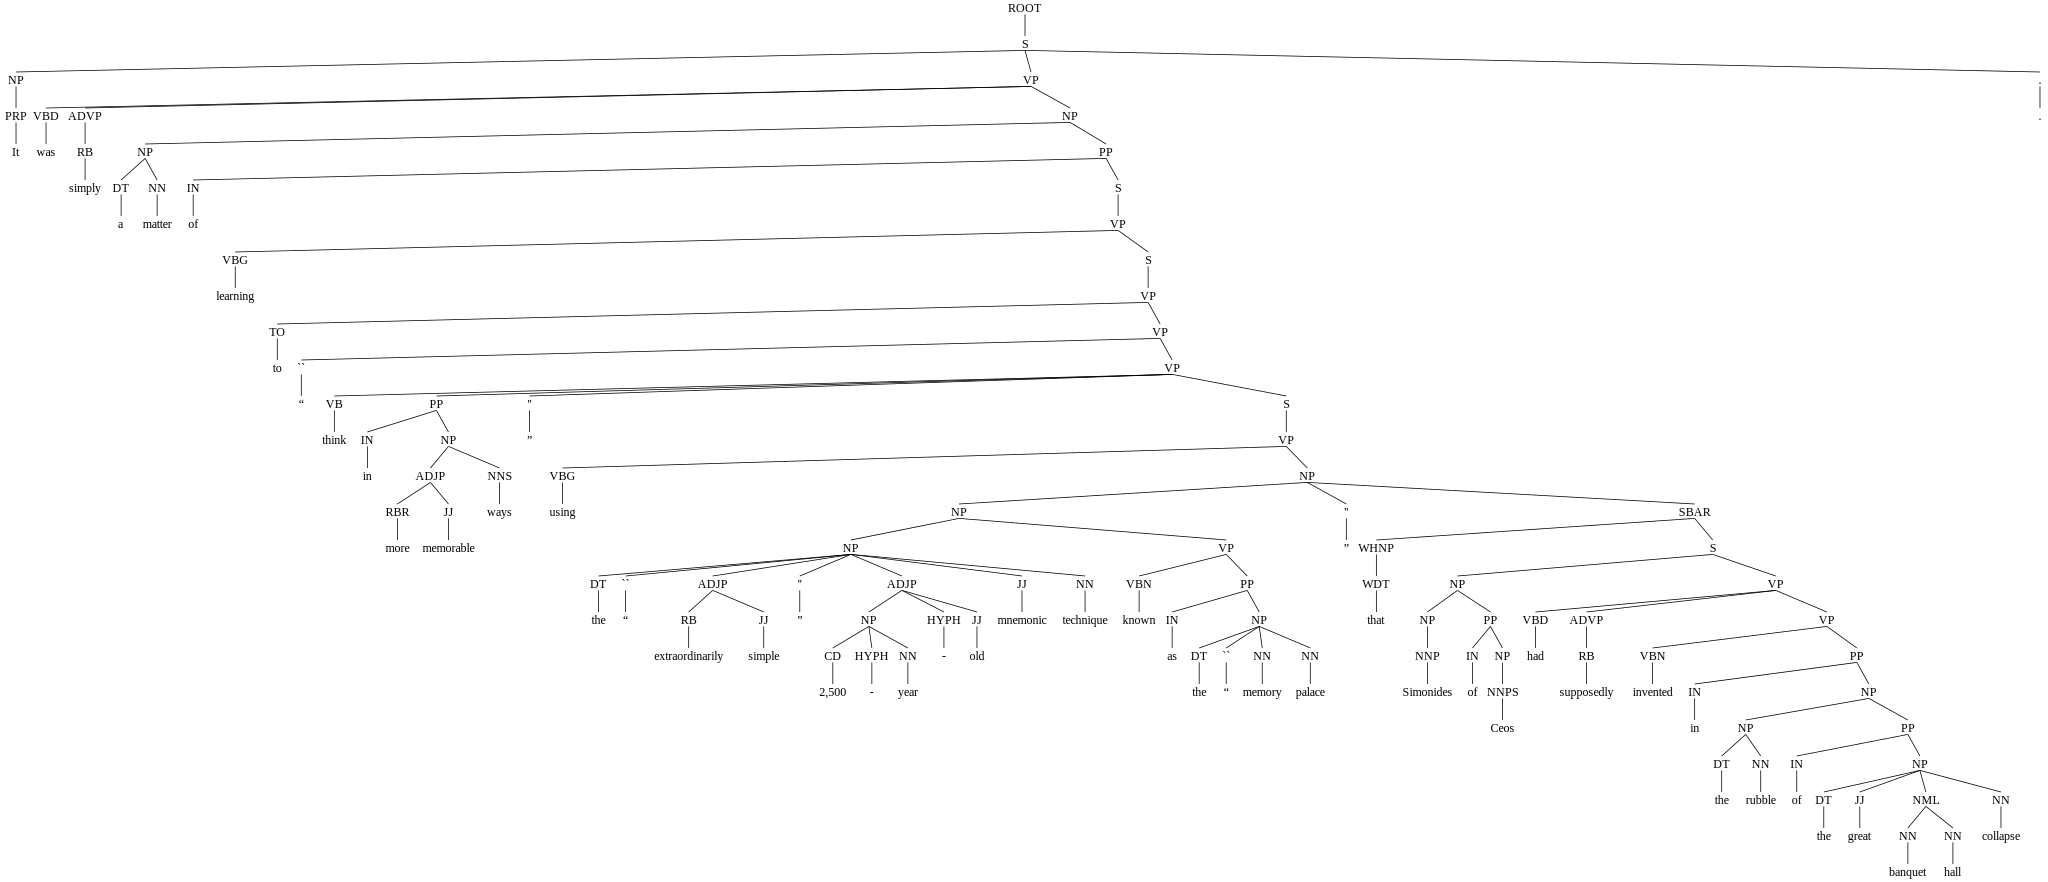

SENTENSE  A trained memory was not just a handy tool, but a fundamental facet of any worldly mind. 




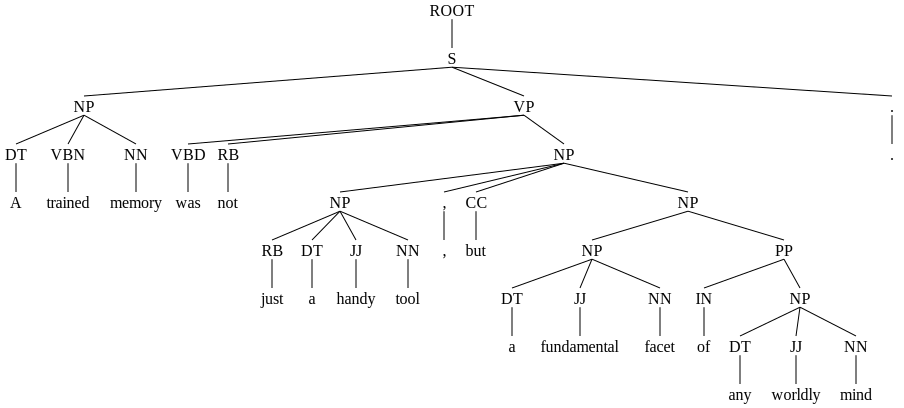

SENTENSE  What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable. 




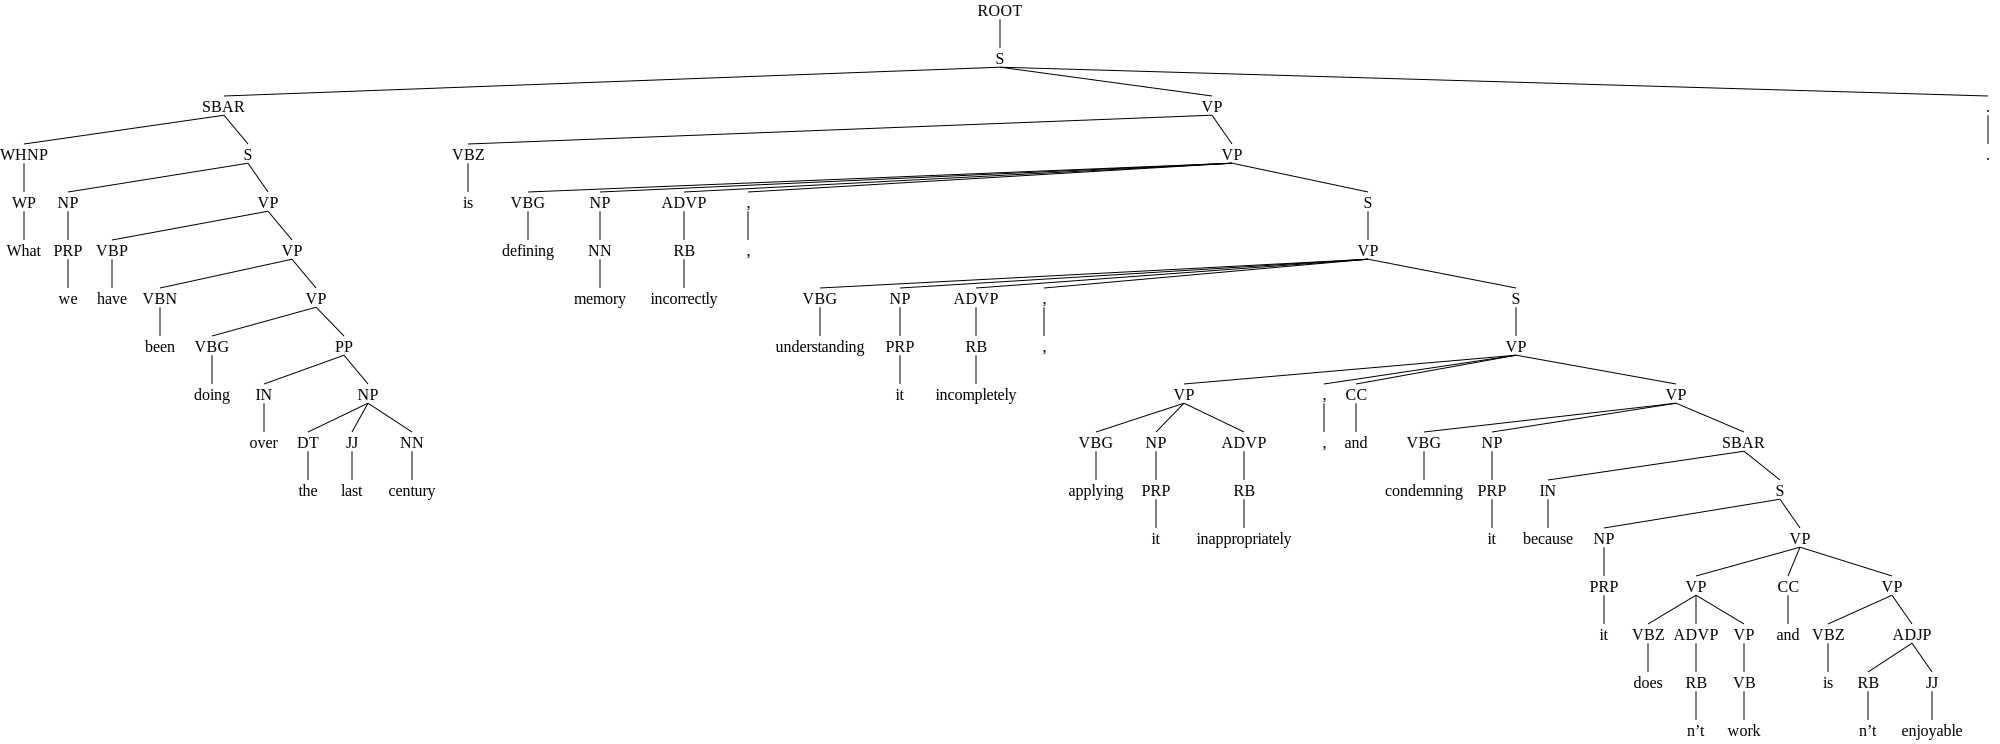

SENTENSE  In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality. 




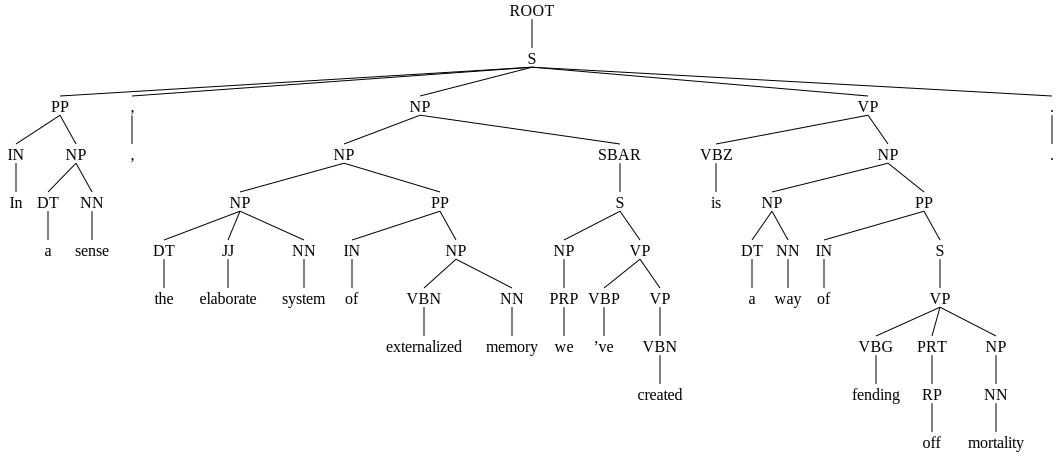

In [ ]:

# iterate through each while extracting the consitituen
print("Constituency Analysis results")
for sentence in all_sentenses:
    print(f"SENTENSE  {sentence} \n\n")
    #pass the sentense through the stanza model
    curr_sent_model = stanza_nlp(sentence)
    curr_tree = curr_sent_model.sentences[0].constituency

    #make it a string and a tree object to display
    curr_tree = Tree.fromstring(curr_tree.pretty_print())
    display(curr_tree)

In [ ]:
# repeat as above for dependency visualization

print("Dependecy Parsing Results")
for sentence in all_sentenses:
    print(f"Sentence:  {sentence}")
    display(spacy.displacy.render(spacy_nlp(sentence), style = "dep", jupyter=True, options={'distance': 90}))

Dependecy Parsing Results
Sentence:  The average person squanders about forty days a year compensating for things he or she has forgotten.


None

Sentence:  It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.


None

Sentence:  A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.


None

Sentence:  What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.


None

Sentence:  In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.


None